## 1. Import necessary libraries

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV , cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
import xgboost as xgb

# 2. Loading data

In [2]:
# loading city,colleges,employee tables
City = pd.read_csv('Data\cities.csv')
College = pd.read_csv('Data\colleges.csv')
employee = pd.read_csv('Data\Ml_case_study.csv')

# 3. Display the data

In [3]:
employee.head()

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
0,SVNIT Surat,Asansol,Manager,55523.0,3,66,19,71406.58
1,NIT Bhopal,Ajmer,Executive,57081.0,1,84,18,68005.87
2,"IEM, Kolkata",Rajpur Sonarpur,Executive,60347.0,2,52,28,76764.02
3,"KIIT, Bhubaneswar",Ajmer,Executive,49010.0,2,81,33,82092.39
4,DTU,Durgapur,Executive,57879.0,4,74,32,73878.10


In [4]:
College.head()

,Tier 1,Tier 2,Tier 3
0,IIT Bombay,IIIT Bangalore,"Ramaiah Institute of Technology, Bengaluru"
1,IIT Delhi,IIIT Delhi,TIET/Thapar University
2,IIT Kharagpur,IGDTUW,Manipal Main Campus
3,IIT Madras,NIT Calicut,VIT Vellore
4,IIT Kanpur,IIITM Gwalior,SRM Main Campus


In [5]:
City.head()

,Metrio City,non-metro cities
0,Mumbai,Dehradun
1,Delhi,Durgapur
2,Kolkata,Asansol
3,Chennai,Rourkela
4,Bangalore,Kozhikode


# 4. Combining these three table into one table

In [6]:
# Create a dictionary for college tiers
college_tier_dict = {}
for tier, colleges in College.items():
    for college in colleges:
        college_tier_dict[college] = tier

In [7]:
# Function to get the college tier
def get_college_tier(college):
    return college_tier_dict.get(college, 'Unknown')

In [8]:
# Create a dictionary for city types
metro_cities = set(City['Metrio City'])
non_metro_cities = set(City['non-metro cities'])

In [9]:
# Function to get the city category
def get_city_category(city):
    if city in metro_cities:
        return 'Metro'
    elif city in non_metro_cities:
        return 'Non-Metro'
    else:
        return ""

In [10]:
# Apply functions to employee dataframe
employee['Tier'] = employee['College'].apply(get_college_tier)
employee['City Category'] = employee['City'].apply(get_city_category)

In [11]:
employee

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Tier,City Category
0,SVNIT Surat,Asansol,Manager,55523.0,3,66,19,71406.58,Tier 2,Non-Metro
1,NIT Bhopal,Ajmer,Executive,57081.0,1,84,18,68005.87,Tier 2,Non-Metro
2,"IEM, Kolkata",Rajpur Sonarpur,Executive,60347.0,2,52,28,76764.02,Tier 3,Non-Metro
3,"KIIT, Bhubaneswar",Ajmer,Executive,49010.0,2,81,33,82092.39,Tier 3,Non-Metro
4,DTU,Durgapur,Executive,57879.0,4,74,32,73878.10,Tier 1,Non-Metro
...,...,...,...,...,...,...,...,...,...,...
1584,BITS Pilani (Goa Campus),Surat,Executive,61285.0,3,44,60,77283.59,Tier 1,Metro
1585,NIT Warangal,Rajpur Sonarpur,Executive,63140.0,1,44,24,68416.86,Tier 1,Non-Metro
1586,NIT Tiruchipally (Trichy),Ahmedabad,Executive,44907.0,1,60,19,70186.19,Tier 1,Metro
1587,IIIT Hyderabad,Durgapur,Executive,52054.0,2,67,29,73394.09,Tier 1,Non-Metro


In [12]:
# Drop college and city column from the table
data = employee.drop(['College','City'],axis=1)

In [13]:
data.head()

,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Tier,City Category
0,Manager,55523.0,3,66,19,71406.58,Tier 2,Non-Metro
1,Executive,57081.0,1,84,18,68005.87,Tier 2,Non-Metro
2,Executive,60347.0,2,52,28,76764.02,Tier 3,Non-Metro
3,Executive,49010.0,2,81,33,82092.39,Tier 3,Non-Metro
4,Executive,57879.0,4,74,32,73878.10,Tier 1,Non-Metro


In [14]:
# checking NULL values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1589 entries, 0 to 1588
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Role                 1589 non-null   object 
 1   Previous CTC         1589 non-null   float64
 2   Previous job change  1589 non-null   int64  
 3   Graduation Marks     1589 non-null   int64  
 4   EXP (Month)          1589 non-null   int64  
 5   CTC                  1589 non-null   float64
 6   Tier                 1589 non-null   object 
 7   City Category        1589 non-null   object 
dtypes: float64(2), int64(3), object(3)
memory usage: 99.4+ KB


In [15]:
# Analysing Distribution of data
data.describe()

,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
count,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000
mean,55518.453744,2.528634,59.855255,39.044682,75353.278798
std,6655.218445,1.123918,14.935139,14.108875,12587.288237
min,36990.000000,1.000000,35.000000,18.000000,53020.320000
25%,50518.000000,2.000000,46.000000,26.000000,66902.350000
50%,55291.000000,3.000000,60.000000,39.000000,73028.670000
75%,60109.000000,4.000000,73.000000,51.000000,80588.670000
max,77911.000000,4.000000,85.000000,64.000000,123416.990000


# 5. Visualize data distribution

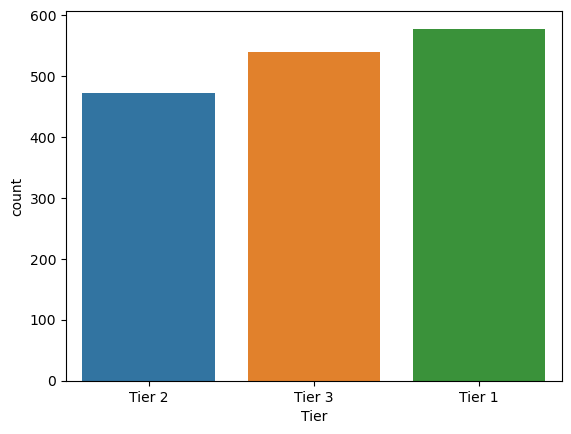

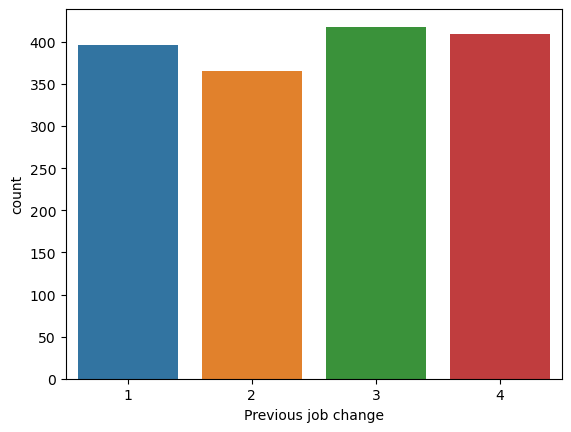

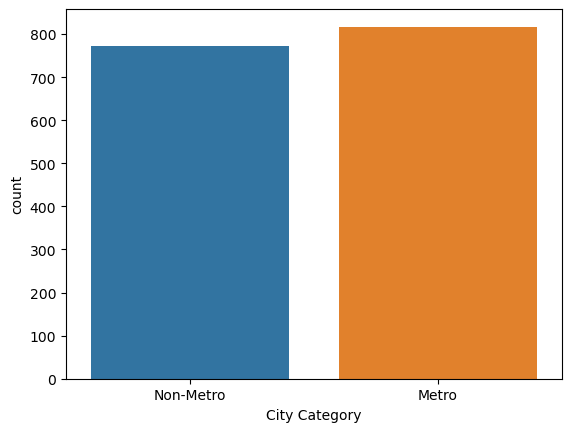

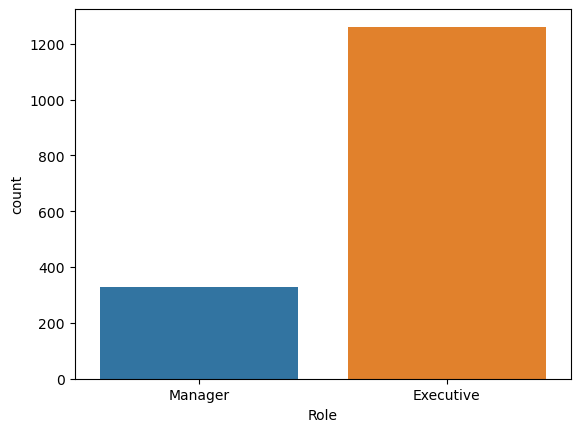

In [16]:
# checking data is balance or not
# Count Plot
sns.countplot(x = data['Tier'],data=data)
plt.show()
sns.countplot(x = data['Previous job change'],data=data)
plt.show()
sns.countplot(x = data['City Category'],data=data)
plt.show()
sns.countplot(x = data['Role'],data=data)
plt.show()

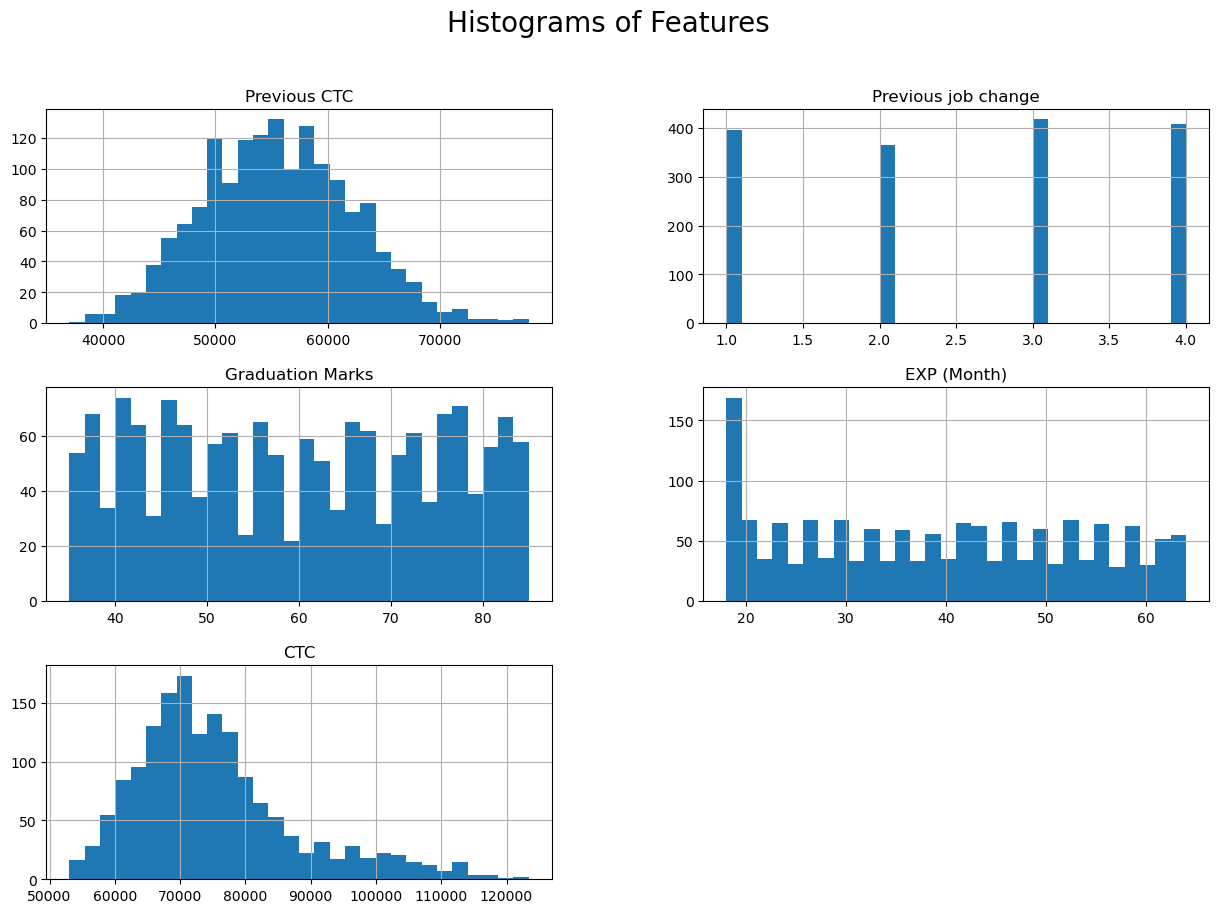

In [17]:
# Histograms
data.hist(bins=30, figsize=(15, 10))
plt.suptitle('Histograms of Features', size=20)
plt.show()

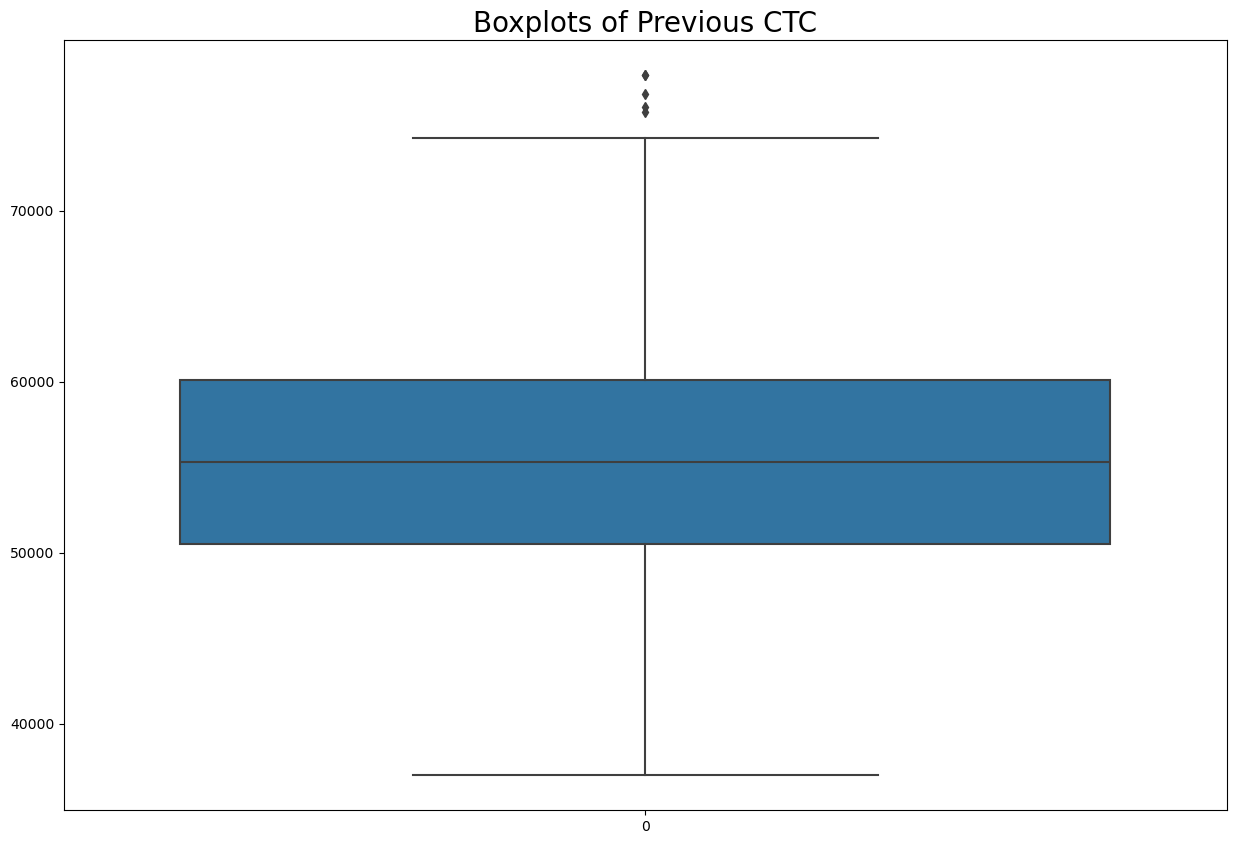

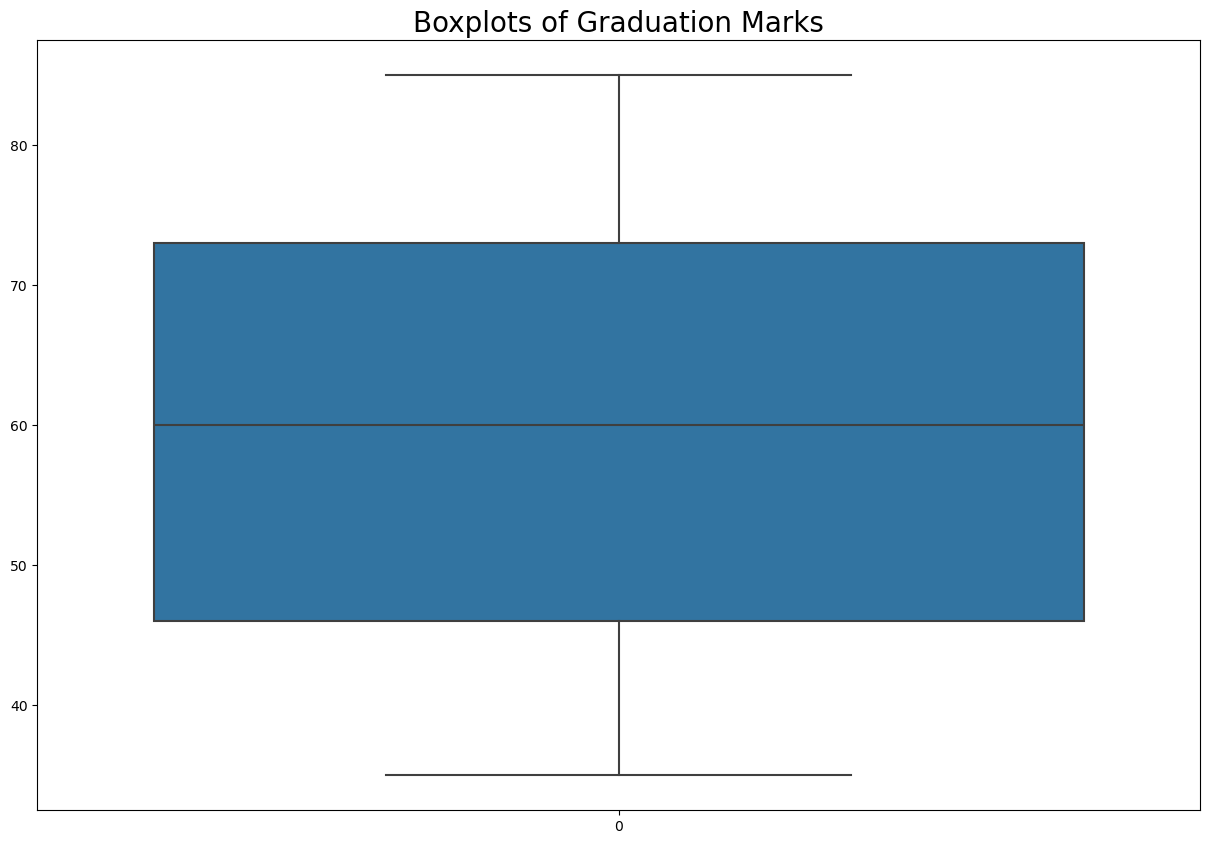

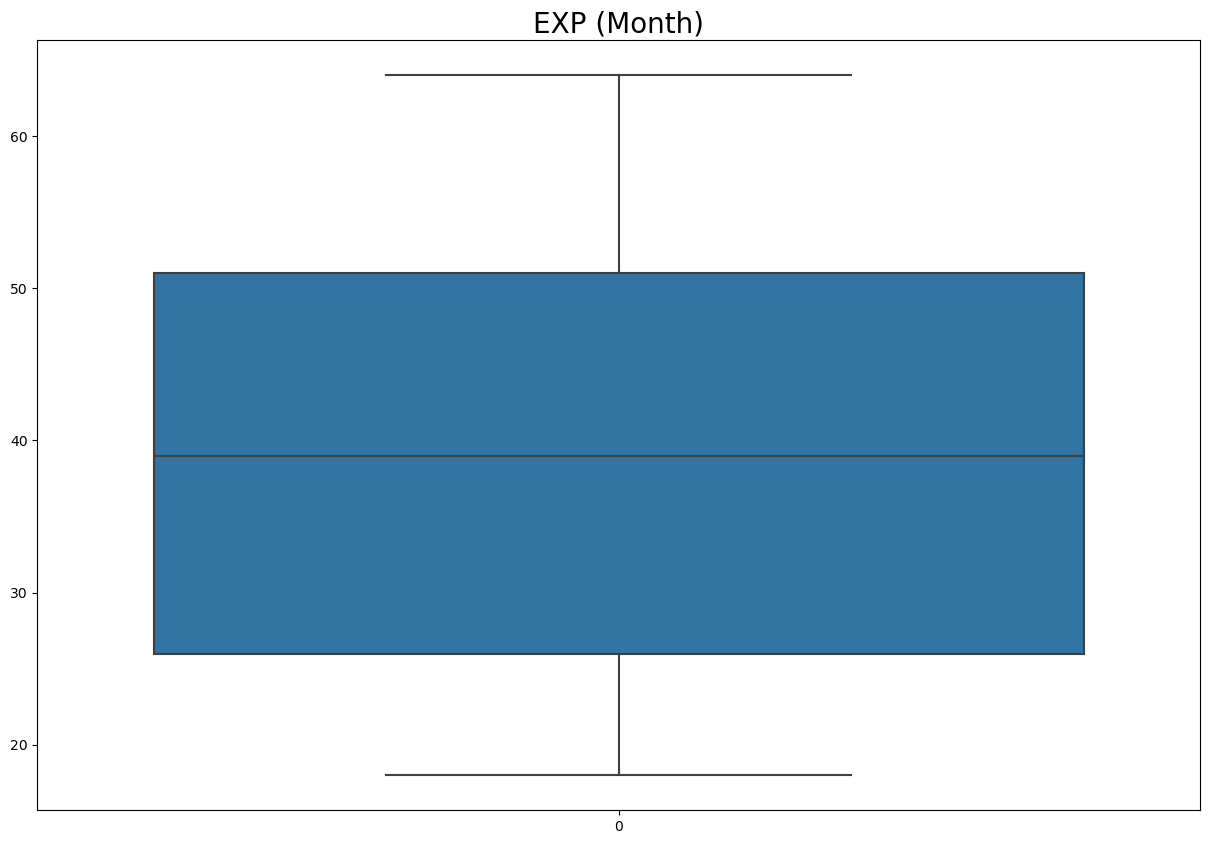

In [18]:
# outlier detection
# Boxplots of Previous CTC column

plt.figure(figsize=(15, 10))
sns.boxplot(data=data['Previous CTC'])
plt.title("Boxplots of Previous CTC", size=20)
plt.show()

# Boxplots of Graduation Marks column
plt.figure(figsize=(15, 10))
plt.title('Boxplots of Graduation Marks', size=20)
sns.boxplot(data=data['Graduation Marks'])
plt.show()

# Boxplots of EXP (Month) column
plt.figure(figsize=(15, 10))
plt.title('EXP (Month)', size=20)
sns.boxplot(data=data['EXP (Month)'])
plt.show()


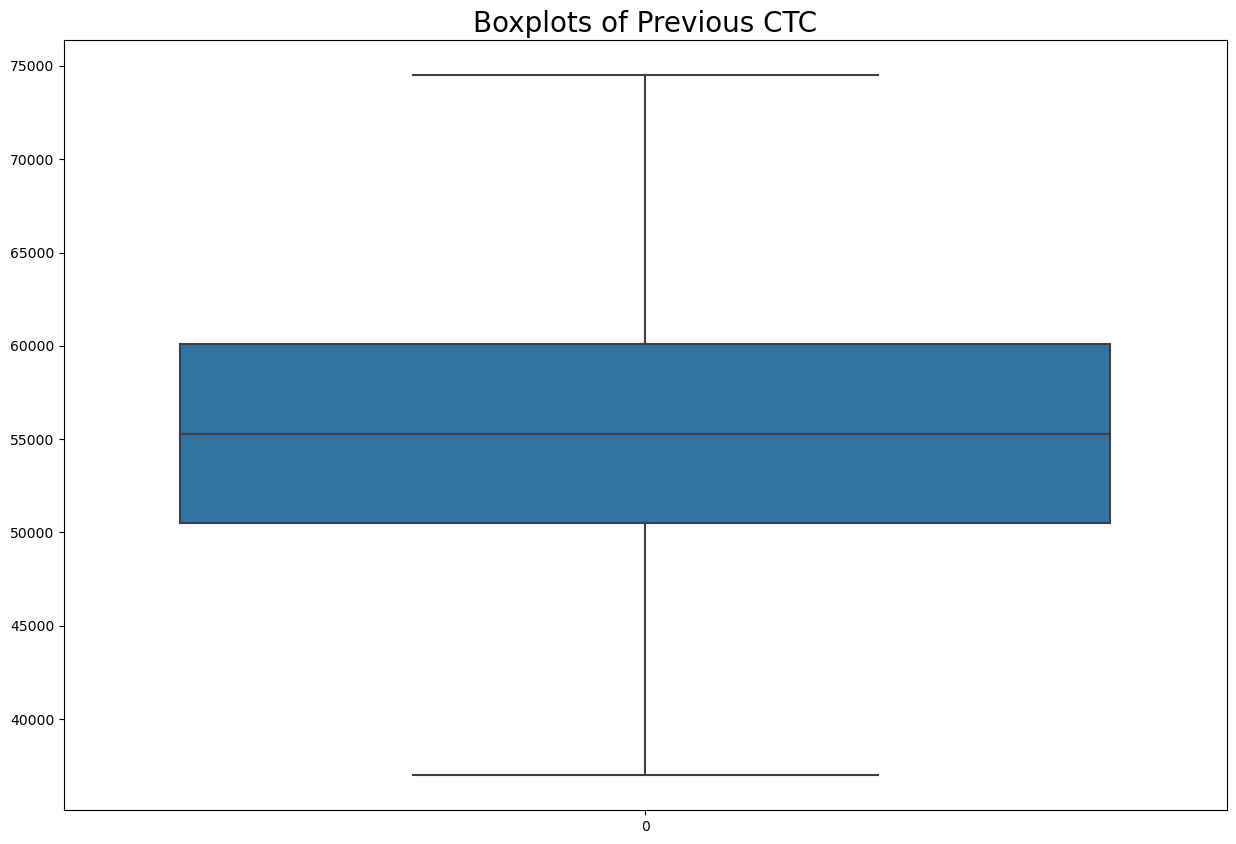

In [19]:
# Calculate the Interquartile Range (IQR) for each numerical feature
Q1 = data['Previous CTC'].quantile(0.25)
Q3 = data['Previous CTC'].quantile(0.75)
IQR = Q3 - Q1

# Calculate the lower and upper bounds for each feature
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

# Replace outliers with the lower or upper bound

data['Previous CTC'] = np.where((data['Previous CTC'] < lower_bound), lower_bound, data['Previous CTC'])
data['Previous CTC'] = np.where((data['Previous CTC'] > upper_bound), upper_bound, data['Previous CTC'])

# Check for outliers again
plt.figure(figsize=(15, 10))
sns.boxplot(data=data['Previous CTC'])
plt.title("Boxplots of Previous CTC", size=20)
plt.show()

C:\Users\deepa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\deepa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\deepa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\deepa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

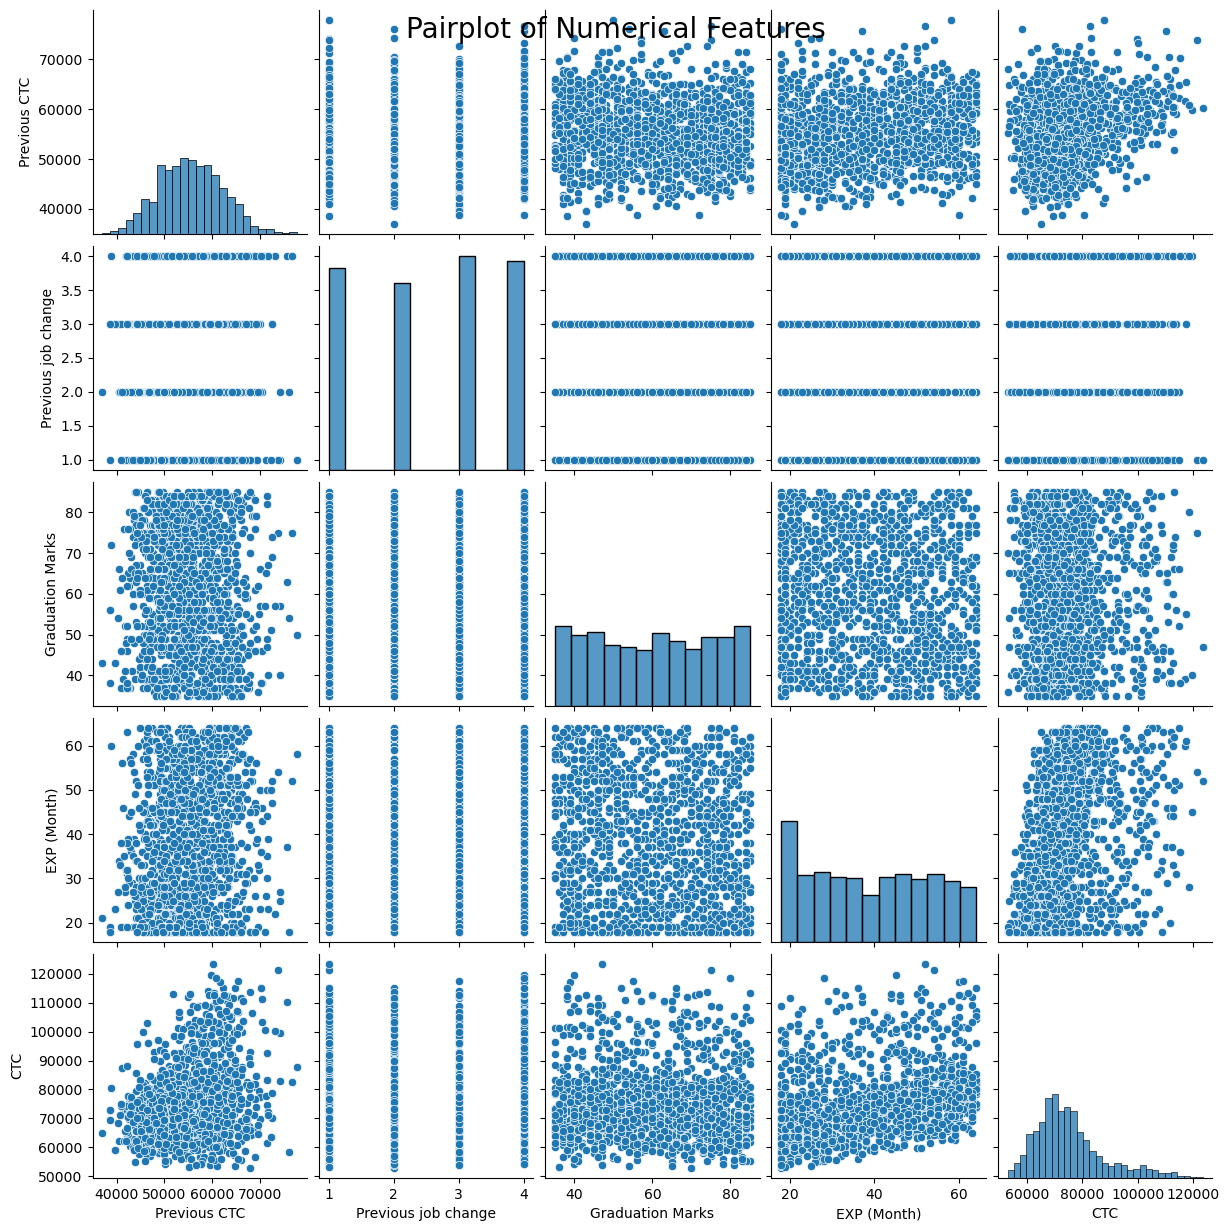

In [20]:
# Pairplot
sns.pairplot(employee.drop(['Role', 'Tier', 'City Category'], axis=1))
plt.suptitle('Pairplot of Numerical Features', size=20)
plt.show()

Text(0.5, 1.0, 'Correlation Matrix Heatmap')

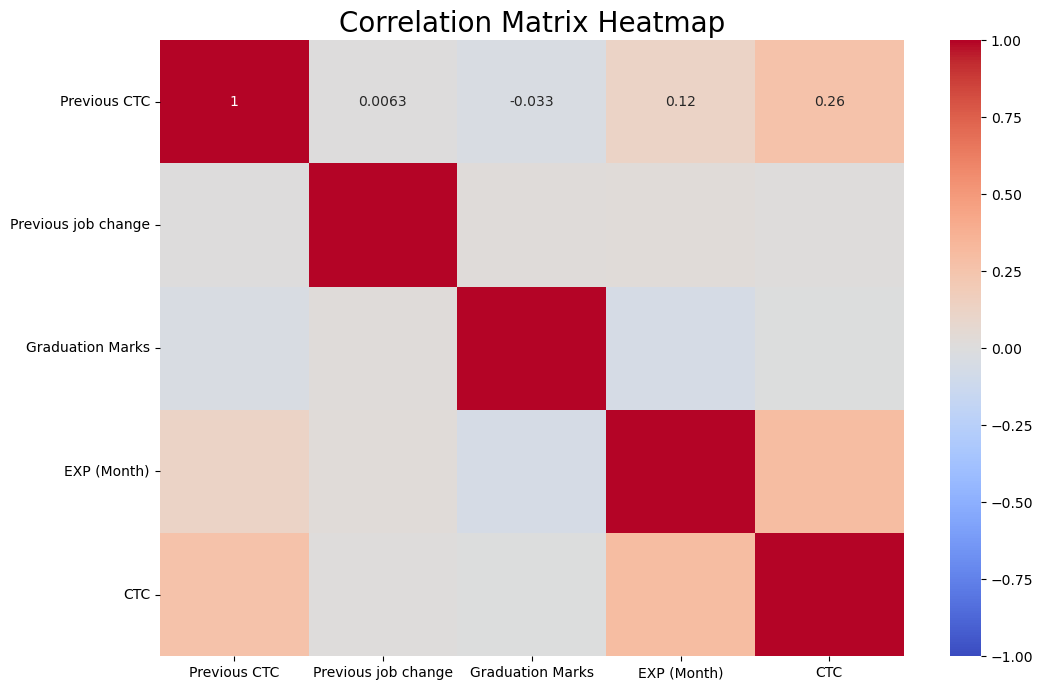

In [21]:
# Correlation Matrix Heatmap
plt.figure(figsize=(12, 8))
corr_matrix = data.drop(['Role', 'Tier', 'City Category'], axis=1).corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap', size=20)

# 6. Data Preprocessing and Encode categorical variables

In [22]:
# Encode 'City' column: 0 for non-metro, 1 for metro
data['City Category'] = data['City Category'].apply(lambda x: 1 if x == 'Metrio City' else 0)

# Encode 'College name' column (ordinal encoding)
college_mapping = {'Tier 1': 3, 'Tier 2': 2, 'Tier 3': 1}
def encoding(tire):
    return college_mapping[tire]
data['Tier'] = data['Tier'].apply(encoding)

# Encode categorical variables
data = pd.get_dummies(data,drop_first=True,dtype='int')

In [23]:
data.head()

,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Tier,City Category,Role_Manager
0,55523.0,3,66,19,71406.58,2,0,1
1,57081.0,1,84,18,68005.87,2,0,0
2,60347.0,2,52,28,76764.02,1,0,0
3,49010.0,2,81,33,82092.39,1,0,0
4,57879.0,4,74,32,73878.10,3,0,0


# 7. Split the dataset into training and testing sets

In [24]:
# Features and target variable
X = data.drop(columns=['CTC'])
y = data['CTC']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# 8. Feature Scaling

In [25]:
# Initialize StandardScaler
scaler = StandardScaler()

# Normalize input features for models that benefit from normalization
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 9. Model Selection

In [26]:
# Building the Models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'XGBoost': xgb.XGBRegressor(random_state=42),
    'Lasso': Lasso(random_state=42),
    'Ridge': Ridge(random_state=42),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Support Vector Machine': SVR()
}


# 10. Model Fitting and Evaluating

In [27]:
# fitting and Evaluating the model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'{name} - Mean Squared Error: {mse:.2f}, R-squared: {r2:.2f}')

Linear Regression - Mean Squared Error: 77311435.83, R-squared: 0.59
Random Forest - Mean Squared Error: 67932004.04, R-squared: 0.64
Gradient Boosting - Mean Squared Error: 73035730.03, R-squared: 0.62
XGBoost - Mean Squared Error: 73287810.11, R-squared: 0.61
Lasso - Mean Squared Error: 77318585.07, R-squared: 0.59
Ridge - Mean Squared Error: 77337865.77, R-squared: 0.59
Decision Tree - Mean Squared Error: 130048439.25, R-squared: 0.32
Support Vector Machine - Mean Squared Error: 196183044.74, R-squared: -0.03


# 11. Define parameter gride for Hyperparameter Tuning

In [28]:

# Define parameter for Random Forest Model
param_grid_random_forest = {
    'n_estimators': [10,30,50],
    'max_depth': [None, 3, 5, 10],
    'min_samples_split': [2, 5, 10]
}

# Define parameter for Gradient Boosting Model
param_grid_gradient_boosting = {
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'n_estimators': [50, 100, 200]
}

# Define parameter for xgboost Model
param_grid_xgboost = {
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'n_estimators': [50, 100, 200]
}

# Define parameter for lasso Model
param_grid_lasso = {
    'alpha': [0.1, 1, 10]
}

# Define parameter for ridge Model
param_grid_ridge = {
    'alpha': [0.1, 1, 10]
}

# Define parameter for decision_tree Model
param_grid_decision_tree = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

#Define parameter for Support Vector Machine Model
param_grid_svr = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'poly', 'rbf']
}


# 12. Create GridSearchCV objects for each model

In [29]:

# Create GridSearchCV object for Random Forest Model
grid_search_random_forest = GridSearchCV(estimator=RandomForestRegressor(random_state=42), param_grid=param_grid_random_forest, cv=5, scoring='r2', n_jobs=-1)

# Create GridSearchCV object for Gradient Boosting
grid_search_gradient_boosting = GridSearchCV(estimator=GradientBoostingRegressor(random_state=42), param_grid=param_grid_gradient_boosting, cv=5, scoring='r2', n_jobs=-1)

# Create GridSearchCV object for xgboost
grid_search_xgboost = GridSearchCV(estimator=xgb.XGBRegressor(random_state=42), param_grid=param_grid_xgboost, cv=5, scoring='r2', n_jobs=-1)

# Create GridSearchCV object for Lasso
grid_search_lasso = GridSearchCV(estimator=Lasso(random_state=42), param_grid=param_grid_lasso, cv=5, scoring='r2', n_jobs=-1)

# Create GridSearchCV object for Ridge
grid_search_ridge = GridSearchCV(estimator=Ridge(random_state=42), param_grid=param_grid_ridge, cv=5, scoring='r2', n_jobs=-1)

# Create GridSearchCV object for Decision Tree
grid_search_decision_tree = GridSearchCV(estimator=DecisionTreeRegressor(random_state=42), param_grid=param_grid_decision_tree, cv=5, scoring='r2', n_jobs=-1)

# Create GridSearchCV object for svm
grid_search_svr = GridSearchCV(estimator=SVR(), param_grid=param_grid_svr, cv=5, scoring='r2', n_jobs=-1)


# 13. Fit the GridSearchCV objects to the data

In [30]:
# Fit the GridSearchCV Random Forest Model objects to the data
grid_search_random_forest.fit(X_train, y_train)

# Fit the GridSearchCV Gradient Boosting Model objects to the data
grid_search_gradient_boosting.fit(X_train, y_train)

# Fit the GridSearchCV xgboost Model objects to the data
grid_search_xgboost.fit(X_train, y_train)

# Fit the GridSearchCV Lasso Model objects to the data
grid_search_lasso.fit(X_train, y_train)

# Fit the GridSearchCV Ridge Model objects to the data
grid_search_ridge.fit(X_train, y_train)

# Fit the GridSearchCV Decision Tree Model objects to the data
grid_search_decision_tree.fit(X_train, y_train)

# Fit the GridSearchCV svm Model objects to the data
grid_search_svr.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10],
                         'kernel': ['linear', 'poly', 'rbf']},
             scoring='r2')

# 14. Getting best parameters and best models

In [31]:
# Get best parameters and best random forest model
best_params_random_forest = grid_search_random_forest.best_params_
best_model_random_forest = grid_search_random_forest.best_estimator_

# Get best parameters and best gradient boosting model
best_params_gradient_boosting = grid_search_gradient_boosting.best_params_
best_model_gradient_boosting = grid_search_gradient_boosting.best_estimator_

# Get best parameters and best xgboost model
best_params_xgboost = grid_search_xgboost.best_params_
best_model_xgboost = grid_search_xgboost.best_estimator_

# Get best parameters and best lasso model
best_params_lasso = grid_search_lasso.best_params_
best_model_lasso = grid_search_lasso.best_estimator_

# Get best parameters and best ridge model
best_params_ridge = grid_search_ridge.best_params_
best_model_ridge = grid_search_ridge.best_estimator_

# Get best parameters and best decision tree model
best_params_decision_tree = grid_search_decision_tree.best_params_
best_model_decision_tree = grid_search_decision_tree.best_estimator_

# Get best parameters and best svm model
best_params_svr = grid_search_svr.best_params_
best_model_svr = grid_search_svr.best_estimator_

# 15. Printing the best parameters

In [32]:
# Print best parameters for All Models
print(f'Best Parameters (Random Forest): {best_params_random_forest}')
print(f'Best Parameters (Gradient Boosting): {best_params_gradient_boosting}')
print(f'Best Parameters (XGBoost): {best_params_xgboost}')
print(f'Best Parameters (Lasso): {best_params_lasso}')
print(f'Best Parameters (Ridge): {best_params_ridge}')
print(f'Best Parameters (Decision Tree): {best_params_decision_tree}')
print(f'Best Parameters (SVR): {best_params_svr}')


Best Parameters (Random Forest): {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}
Best Parameters (Gradient Boosting): {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100}
Best Parameters (XGBoost): {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100}
Best Parameters (Lasso): {'alpha': 10}
Best Parameters (Ridge): {'alpha': 10}
Best Parameters (Decision Tree): {'max_depth': 10, 'min_samples_split': 10}
Best Parameters (SVR): {'C': 10, 'kernel': 'linear'}


# 16. Fit the best models obtained from Hyperparameter Tuning

In [33]:
# Fit the best Random Forest models
best_model_random_forest.fit(X_train, y_train)

# Fit the best Gradient Boosting models
best_model_gradient_boosting.fit(X_train, y_train)

# Fit the best Xgboost models
best_model_xgboost.fit(X_train, y_train)

# Fit the best Lasso models
best_model_lasso.fit(X_train, y_train)

# Fit the best Ridge models
best_model_ridge.fit(X_train, y_train)

# Fit the best Decision Tree models
best_model_decision_tree.fit(X_train, y_train)

# Fit the best svm models
best_model_svr.fit(X_train, y_train)


SVR(C=10, kernel='linear')

# 17. Predictions on test data

In [34]:
# Predictions on test data On best random forest models
y_pred_random_forest = best_model_random_forest.predict(X_test)

# Predictions on test data On best gradient boosting models
y_pred_gradient_boosting = best_model_gradient_boosting.predict(X_test)

# Predictions on test data On best xgboost models
y_pred_xgboost = best_model_xgboost.predict(X_test)

# Predictions on test data On best lasso models
y_pred_lasso = best_model_lasso.predict(X_test)

# Predictions on test data On best ridge models
y_pred_ridge = best_model_ridge.predict(X_test)

# Predictions on test data On best decision tree models
y_pred_decision_tree = best_model_decision_tree.predict(X_test)

# Predictions on test data On best svm models
y_pred_svm = best_model_svr.predict(X_test)

# 18. Compute Mean Squared Error (MSE) and R-squared (R2) for each model

In [35]:
# Compute Mean Squared Error (MSE) and R-squared (R2) for Random Forest model

mse_random_forest = mean_squared_error(y_test, y_pred_random_forest)
r2_random_forest = r2_score(y_test, y_pred_random_forest)

# Compute Mean Squared Error (MSE) and R-squared (R2) for gradient Boosting model
mse_gradient_boosting = mean_squared_error(y_test, y_pred_gradient_boosting)
r2_gradient_boosting = r2_score(y_test, y_pred_gradient_boosting)

# Compute Mean Squared Error (MSE) and R-squared (R2) for Xgboost model
mse_xgboost = mean_squared_error(y_test, y_pred_xgboost)
r2_xgboost = r2_score(y_test, y_pred_xgboost)

# Compute Mean Squared Error (MSE) and R-squared (R2) for lasso model
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

# Compute Mean Squared Error (MSE) and R-squared (R2) for Ridge model
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

# Compute Mean Squared Error (MSE) and R-squared (R2) for Decision Tree model
mse_decision_tree = mean_squared_error(y_test, y_pred_decision_tree)
r2_decision_tree = r2_score(y_test, y_pred_decision_tree)

# Compute Mean Squared Error (MSE) and R-squared (R2) for svm model
mse_svm = mean_squared_error(y_test, y_pred_svm)
r2_svm = r2_score(y_test, y_pred_svm)

# 19. Printing the Error And r2 score of Best models

In [36]:
# Print MSE and R2 for Best random forest model
print(f'Random Forest - Mean Squared Error: {mse_random_forest:.2f}, R-squared: {r2_random_forest:.2f}')

# Print MSE and R2 for Best gradient boosting model
print(f'Gradient Boosting - Mean Squared Error: {mse_gradient_boosting:.2f}, R-squared: {r2_gradient_boosting:.2f}')

# Print MSE and R2 for Best xgboost model
print(f'XGBoost - Mean Squared Error: {mse_xgboost:.2f}, R-squared: {r2_xgboost:.2f}')

# Print MSE and R2 for Best lasso model
print(f'Lasso - Mean Squared Error: {mse_lasso:.2f}, R-squared: {r2_lasso:.2f}')

# Print MSE and R2 for Best ridge model
print(f'Ridge - Mean Squared Error: {mse_ridge:.2f}, R-squared: {r2_ridge:.2f}')

# Print MSE and R2 for Best decision tree model
print(f'Decision Tree - Mean Squared Error: {mse_decision_tree:.2f}, R-squared: {r2_decision_tree:.2f}')

# Print MSE and R2 for Best svm model
print(f'svr - Mean Squared Error: {mse_svm:.2f}, R-squared: {r2_svm:.2f}')

Random Forest - Mean Squared Error: 68861678.88, R-squared: 0.64
Gradient Boosting - Mean Squared Error: 72595507.26, R-squared: 0.62
XGBoost - Mean Squared Error: 72026528.56, R-squared: 0.62
Lasso - Mean Squared Error: 77383451.33, R-squared: 0.59
Ridge - Mean Squared Error: 77578140.62, R-squared: 0.59
Decision Tree - Mean Squared Error: 91395041.40, R-squared: 0.52
svr - Mean Squared Error: 126123536.25, R-squared: 0.34


# 12. Choosing the best model among all models

In [37]:
#The best model working with our data is Random Forest, which has the lowest mean squared error

Model = best_model_random_forest
mse_Model_test = mean_squared_error(y_test, Model.predict(X_test))
r2_Model_test = r2_score(y_test, Model.predict(X_test))
print(f'Random Forest on Testing data - Mean Squared Error:{mse_Model_test :.2f}, R-squared: {r2_Model_test:.2f}')


Random Forest on Testing data - Mean Squared Error:68861678.88, R-squared: 0.64


# Tasks

# 1. Your views about the problem statement?

The problem statement of creating a machine learning model to determine the salary of newly hired employees is quite common in the domain of human resources and talent management. It's a classic regression problem where the target variable (salary) is continuous, and the goal is to predict this variable based on various features or attributes of the employees.

Here are my views on the problem statement:

1. Relevance: 
Determining salaries is a critical aspect of workforce management and organizational planning. Having an accurate predictive model can help companies make informed decisions about compensation, budgeting, and talent acquisition.

2. Data-driven Approach: 
Using machine learning for salary prediction allows for a data-driven approach rather than relying solely on subjective assessments or market trends. This can lead to more objective and consistent salary decisions.

3. Features Selection: 
The choice of features or attributes used in the model is crucial. Factors like education level, experience, job role, previous compensation, and performance metrics can significantly impact salary levels.

4. Model Selection: 
Choosing the right regression model is essential. Different models have varying strengths and weaknesses, and the best-performing model often depends on the specific dataset and problem at hand.

5. Performance Evaluation: 
It's important to evaluate the model's performance using appropriate metrics such as Mean Squared Error (MSE), R-squared (R2), or others relevant to regression tasks. This evaluation helps in understanding how well the model predicts salaries.

6. Continuous Improvement: 
Building a predictive model is not a one-time task. Continuous monitoring, feedback incorporation, and model retraining are necessary for ensuring accuracy and relevance over time.

Overall, addressing the problem statement involves a combination of data preparation, model building, evaluation, and iterative improvement to create a robust and accurate salary prediction system.

# 2. What will be your approach to solving this task?

My approach to solving the task of predicting employee salaries using machine learning would involve several key steps:

1. Data Understanding and Preprocessing:
Understand the available data, including the features (attributes) and the target variable (salary).
Perform data cleaning to handle missing values, outliers, and any inconsistencies in the data.
Convert categorical variables into numerical format using techniques like one-hot encoding or label encoding.

2. Feature Selection and Engineering:
Identify relevant features that can influence salary predictions, such as education level, experience, job role, previous compensation, etc.
Perform feature engineering if necessary, such as creating new features or transforming existing ones to improve model performance.

3. Splitting the Data:
Split the dataset into training and testing sets to train the model on one part of the data and evaluate its performance on unseen data.

4. Model Selection:
Choose a set of regression models suitable for the task, such as Linear Regression, Random Forest, Gradient Boosting, XGBoost, Lasso, Ridge, and Decision Tree.
Implement each model and evaluate its initial performance using metrics like Mean Squared Error (MSE) or R-squared (R2).

5. Hyperparameter Tuning:
Perform hyperparameter tuning for selected models using techniques like GridSearchCV or RandomizedSearchCV to find the best combination of hyperparameters that optimize model performance.

6. Normalization (if required):
Normalize input features if the selected models benefit from feature scaling. StandardScaler or MinMaxScaler can be used for this purpose.

7. Model Training and Evaluation:
Train the selected models on the training data, using the optimized hyperparameters and normalized input if applicable.
Evaluate the trained models' performance on the testing data using evaluation metrics like MSE, R2, and possibly others like MAE (Mean Absolute Error) or RMSE (Root Mean Squared Error).

8. Selecting the Best Model:
Compare the performance of all trained models and select the one with the best performance metrics on the testing set.
Save the best-performing model for future predictions and deployment.
Documentation and Reporting:

# 3. What were the available ML model options you had to perform this task?

For predicting employee salaries, several machine learning (ML) model options can be considered. Here are some of the commonly used ML models for regression tasks like salary prediction:

1. Linear Regression: 
A simple and interpretable model that assumes a linear relationship between input features and the target variable (salary).

2. Random Forest Regression: 
Ensemble learning technique that combines multiple decision trees to improve predictive accuracy and handle non-linear relationships.

3. Gradient Boosting Regression: 
Another ensemble method that builds decision trees sequentially, focusing on the errors of previous trees to improve prediction accuracy.

4. XGBoost Regression: 
An optimized implementation of gradient boosting that offers better performance and efficiency, often used for large datasets.

5. Lasso Regression: 

Linear regression with regularization, which penalizes large coefficients to prevent overfitting and promote sparsity in the model.

6. Ridge Regression: 
Similar to Lasso but uses a different regularization technique (L2 regularization) to penalize large coefficients.

7. Decision Tree Regression: 
A non-linear model that splits the data into segments based on feature thresholds, useful for capturing complex relationships.

These ML models offer different strengths and are suitable for various scenarios based on factors like dataset size, feature complexity, interpretability, and the need for predictive accuracy. It's common to experiment with multiple models and choose the one that performs best based on evaluation metrics such as Mean Squared Error (MSE), R-squared (R2), or others relevant to regression tasks.

# 4. Which model’s performance is best and what could be the possible reason for that?

Random Forest model is performing the best among the models I have tested for predicting employee salaries, several reasons could contribute to its superior performance:

1. Ensemble Learning: 
Random Forest is an ensemble learning method that combines multiple decision trees to make predictions. This ensemble approach helps reduce overfitting and variance in the model, leading to improved generalization and predictive accuracy.

2. Non-Linearity: 
Random Forest can capture non-linear relationships between input features and the target variable (salary) effectively. This is crucial in real-world scenarios where the relationship between predictors and salary may not be linear.

3. Feature Importance: 
Random Forest provides insights into feature importance, allowing you to identify the most influential factors in predicting salaries. This information can guide feature selection and improve model interpretability.

4. Robustness to Outliers: 
Random Forest is robust to outliers and noisy data, as it averages predictions from multiple trees. This robustness can lead to stable performance even in the presence of outliers.

5. Handling Missing Values: 
Random Forest can handle missing values in the data without requiring imputation, making it convenient for datasets with incomplete information.

6. Hyperparameter Tuning: 
Proper hyperparameter tuning, such as optimizing the number of trees, maximum depth of trees, and minimum samples per leaf, can significantly enhance Random Forest's performance.

7. Data Quality: 
High-quality and well-preprocessed data contribute to Random Forest's performance. Ensuring clean data, appropriate encoding of categorical variables, and feature scaling (if necessary) can boost model accuracy.

8. Cross-Validation: 
Using techniques like k-fold cross-validation can help assess Random Forest's performance robustly and ensure its generalization to new data.

Overall, Random Forest's ability to handle complex relationships, feature importance insights, robustness to outliers, and ensemble learning advantages contribute to its best performance in predicting employee salaries in this problem statement.

# 5. What steps can you take to improve this selected model’s performance even further?


To further improve the performance of the Random Forest model for predicting employee salaries, you can consider implementing the following steps:

1. Fine-Tune Hyperparameters:
Conduct a more extensive hyperparameter search using techniques like GridSearchCV or RandomizedSearchCV. Experiment with a wider range of values for parameters such as the number of trees, maximum depth of trees, minimum samples per leaf, and the maximum number of features considered for splitting.

2. Feature Engineering:
Explore additional feature engineering techniques such as polynomial features, interaction terms, or domain-specific transformations that may capture more complex relationships between input features and salary.

3. Feature Selection:
Use feature selection methods like Recursive Feature Elimination (RFE), feature importance from Random Forest, or SelectFromModel to identify and select the most relevant features for salary prediction. Removing irrelevant or redundant features can improve model efficiency and performance.

4. Ensemble Techniques:
Experiment with advanced ensemble techniques such as Gradient Boosting Machines (GBM), Extreme Gradient Boosting (XGBoost), or LightGBM. These models often provide competitive performance and may outperform Random Forest in certain scenarios.

5. Data Sampling Strategies:
Consider employing data sampling techniques like SMOTE (Synthetic Minority Over-sampling Technique) or ADASYN (Adaptive Synthetic Sampling) if the dataset is imbalanced, especially if certain salary ranges are underrepresented.

6. Regularization:
Tune the regularization parameters of the Random Forest model, such as the minimum samples required to split a node or the maximum depth of trees, to prevent overfitting and improve generalization.

7. Cross-Validation:
Use robust cross-validation techniques like stratified k-fold cross-validation to evaluate the model's performance more accurately and ensure its generalization to unseen data.

8. Ensemble of Random Forests:
Consider building an ensemble of Random Forest models with different hyperparameter settings or trained on different subsets of the data. Combining predictions from multiple Random Forest models can often lead to improved performance.

9. Model Interpretability:
Explore techniques to enhance model interpretability, such as partial dependence plots, feature importance plots, or SHAP (SHapley Additive exPlanations) values. Understanding how the model makes predictions can guide further improvements and validate its decision-making process.

10. Data Quality Check:
Perform a thorough data quality check to ensure the dataset is clean, consistent, and free from outliers or errors. Address any data preprocessing issues or anomalies that could affect model performance.

By implementing these steps systematically and iteratively refining the Random Forest model based on evaluation metrics, you can significantly enhance its performance and accuracy in predicting employee salaries.